In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.maxcolumns',20)
pd.set_option('display.maxrows',25)

NameError: name 'warnings' is not defined

In [55]:
character_deaths = pd.read_csv('../Niteo/game-of-thrones/character-deaths.csv')

In [56]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [57]:
character_deaths.Name.describe()

count       917
unique      916
top       Myles
freq          2
Name: Name, dtype: object

In [58]:
#find house of every nobleman to die
#Sample only nobles
HouseDF = character_deaths[character_deaths.Nobility == 1]

In [59]:
HouseDF['Name']=HouseDF.Name.apply(lambda x:x.lower())

C:\Users\amuthiyan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
HouseDF.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,addam marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,aegon frey (jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,aegon targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,adrack humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,aemon costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [71]:
#Find house of every noble
def splitName(x):
    x=x.split(' ')
    if len(x)>1:
        if x[1]=='of' or x[1]=='mo' or x[1]=='zo':
            x=x[2]
        else:
            x=x[1]
    else:
        x='none'
    return x
HouseDF['House']=HouseDF.Name.apply(splitName)

C:\Users\amuthiyan\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
HouseDF.sample(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,House
502,mag mar tun doh weg,Wildling,300.0,3.0,64.0,15.0,1,1,0,0,1,0,0,mar
677,ramsay snow,None,NaN,NaN,NaN,16.0,1,1,0,1,0,0,1,snow
797,theo frey,None,NaN,NaN,NaN,29.0,1,1,1,0,0,0,0,frey
102,boremund harlaw,Greyjoy,NaN,NaN,NaN,11.0,1,1,0,0,0,1,0,harlaw
491,lymond goodbrook,Tully,NaN,NaN,NaN,45.0,1,1,0,0,1,0,0,goodbrook
84,benfred tallhart,Stark,299.0,2.0,37.0,16.0,1,1,0,1,0,0,0,tallhart
64,barbrey dustin,Stark,NaN,NaN,NaN,26.0,0,1,0,0,0,0,1,dustin
410,jon umber (greatjon),Stark,NaN,NaN,NaN,51.0,1,1,1,1,1,0,0,umber
253,fogo,None,298.0,1.0,61.0,46.0,1,1,1,0,0,0,0,none
197,donnel locke,Stark,299.0,3.0,51.0,25.0,1,1,0,1,1,0,0,locke


In [91]:
House_test = HouseDF.loc[0::,['House','Name']]

In [92]:
House_test.head()

,House,Name
0,marbrand,addam marbrand
1,frey,aegon frey (jinglebell)
2,targaryen,aegon targaryen
3,humble,adrack humble
4,costayne,aemon costayne


In [93]:
House_grp = House_test.groupby('House')

In [99]:
grp_cnt=House_grp.count()

In [100]:
grp_cnt

,Name
House,
allyrion,1
ambrose,1
arryn,1
banefort,1
bar,1
baratheon,5
belmore,2
bettley,1
blackmont,3


C:\Users\amuthiyan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


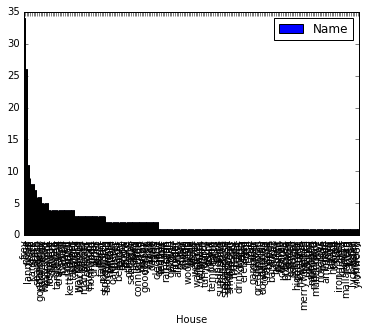

In [113]:
grp_cnt.sort(['Name'], ascending=[0])

In [118]:
plot_cnt = grp_cnt[grp_cnt.Name>3]

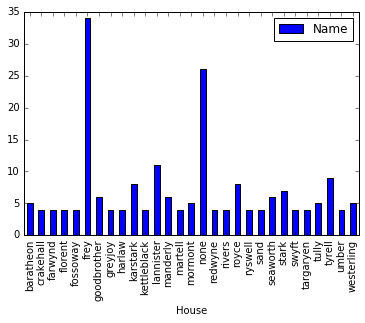

In [119]:
plot_cnt.plot(kind = 'bar')

In [120]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [196]:
longevity = character_deaths.loc[0::,['Allegiances','GoT','CoK','SoS','FfC','DwD','Gender']]

In [124]:
longevity.head()

,Allegiances,GoT,CoK,SoS,FfC,DwD
0,Lannister,1,1,1,1,0
1,None,0,0,1,0,0
2,House Targaryen,0,0,0,0,1
3,House Greyjoy,0,0,0,0,1
4,Lannister,0,0,1,0,0


In [127]:
longevity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 6 columns):
Allegiances    917 non-null object
GoT            917 non-null int64
CoK            917 non-null int64
SoS            917 non-null int64
FfC            917 non-null int64
DwD            917 non-null int64
dtypes: int64(5), object(1)
memory usage: 43.1+ KB


In [197]:
longevity['bkCnt'] = longevity.GoT + longevity.CoK + longevity.SoS + longevity.FfC + longevity.DwD

In [134]:
longevity.head()

,Allegiances,GoT,CoK,SoS,FfC,DwD,bkCnt
0,Lannister,1,1,1,1,0,4
1,None,0,0,1,0,0,1
2,House Targaryen,0,0,0,0,1,1
3,House Greyjoy,0,0,0,0,1,1
4,Lannister,0,0,1,0,0,1


In [198]:
#parse allegiences to readable form
def splitAleg(x):
    x=x.lower()
    x=x.split(' ')
    if x[0]=='house':
        x=x[1]
    else:
        x=x[0]
    return x
longevity['Allegiances']=longevity.Allegiances.apply(splitAleg)

In [136]:
longevity.sample(10)

,Allegiances,GoT,CoK,SoS,FfC,DwD,bkCnt
648,none,0,0,1,0,0,1
353,none,0,1,0,0,0,1
827,targaryen,0,0,0,0,1,1
568,martell,0,0,1,0,0,1
365,tully,0,0,0,1,0,1
494,none,0,1,0,0,0,1
242,targaryen,1,0,0,0,0,1
11,targaryen,1,1,1,0,1,4
474,tyrell,1,1,1,1,0,4
434,tyrell,0,0,0,1,1,2


In [138]:
longevity.Allegiances.describe()

count      917
unique      12
top       none
freq       253
Name: Allegiances, dtype: object

In [199]:
longevity = longevity.loc[0::,['Allegiances','bkCnt','Gender']]

In [140]:
longevity.head()

,Allegiances,bkCnt
0,lannister,4
1,none,1
2,targaryen,1
3,greyjoy,1
4,lannister,1


In [142]:
#group by allegiance
long_grp = longevity.groupby('Allegiances')

In [146]:
long_grp.mean()

,bkCnt
Allegiances,
arryn,1.500000
baratheon,1.625000
greyjoy,1.186667
lannister,2.049020
martell,1.432432
night's,1.784483
none,1.371542
stark,1.694444
targaryen,2.000000


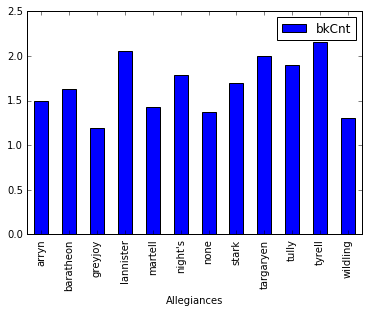

In [170]:
long_grp.mean().plot(kind='bar')

In [148]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [152]:
Gender_test = character_deaths.loc[0::,['Name','Gender']]

In [153]:
Gender_test.head()

,Name,Gender
0,Addam Marbrand,1
1,Aegon Frey (Jinglebell),1
2,Aegon Targaryen,1
3,Adrack Humble,1
4,Aemon Costayne,1


In [157]:
def repGen(x):
    if x==1:
        x='Male'
    elif x==0:
        x='Female'
    return x
Gender_test['Gender']=Gender_test.Gender.apply(repGen)

In [159]:
Gender_test.sample(5)

,Name,Gender
307,Grubbs,Male
121,Byam Flint,Male
781,Sybell Spicer,Female
903,Yellow Dick,Male
493,Lyn Corbray,Male


In [160]:
gender_grp = Gender_test.groupby('Gender')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5E2E48>], dtype=object)

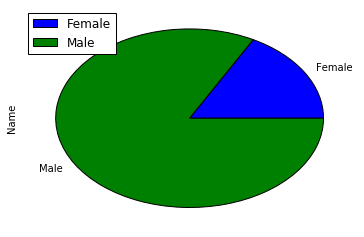

In [166]:
gender_grp.count().plot(kind='pie', subplots='True')

In [171]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [173]:
Nobles = character_deaths.loc[0::,['Name','Nobility']]

In [178]:
def repNob(x):
    if x==1:
        x='Noble'
    elif x==0:
        x='Common'
    return x
Nobles['Nobility']=Nobles.Nobility.apply(repNob)

In [179]:
Noble_grp = Nobles.groupby('Nobility')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E478208>], dtype=object)

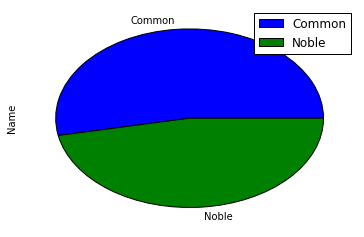

In [180]:
Noble_grp.count().plot(kind='pie',subplots='True')
#commons die more than nobles, but only slightly

In [202]:
longevity.sample(5)

,Allegiances,bkCnt,Gender
655,greyjoy,1,1
598,martell,2,0
365,tully,1,1
374,night's,2,1
862,none,2,1


In [208]:
def repGen(x):
    if x==1:
        x='Male'
    elif x==0:
        x='Female'
    return x
longevity['Gender']=longevity.Gender.apply(repGen)

In [211]:
Aleg_Gen_grp = longevity.groupby(['Allegiances','Gender'])

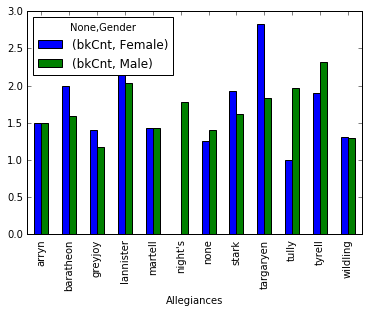

In [223]:
Aleg_Gen_grp.mean().unstack().plot(kind='bar')
#higher means less deaths

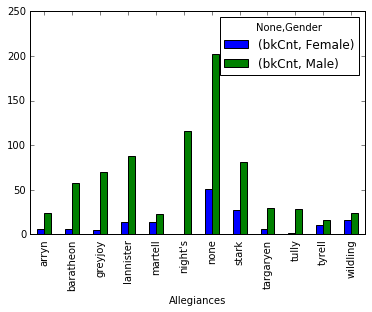

In [224]:
Aleg_Gen_grp.count().unstack().plot(kind='bar')
#Higher means more deaths